In [1]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt
import roadrunner as rr

In [2]:
modelName = "Model1bound"
#modelName = "Model2bound"


model = bionetgen.bngmodel(modelName + ".bngl") 
sim = model.setup_simulator() 
sim.setIntegrator('cvode')


In [3]:
for s in model.species:
    print(s, model.species[s])

0 Ras(a~0,sos) _InitialConc1
1 Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS


In [5]:

species_list = list(model.species)  # convert to list  access by index
free_Ras  = species_list[0]  # Ras(a~0,sos) RasTotal
bound_SOS = species_list[1]  # Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS

# Number of initially bound SOS
n_bound = 1

RasTotal = 1000 

model.species[bound_SOS] = n_bound
model.species[free_Ras] = RasTotal - n_bound

print("Free Ras count:", model.species[free_Ras])
print("Bound SOS count:", model.species[bound_SOS])




Free Ras count: 999
Bound SOS count: 1


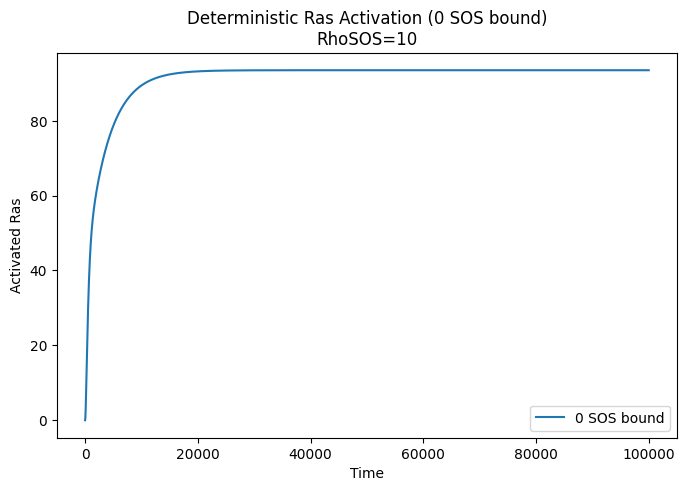

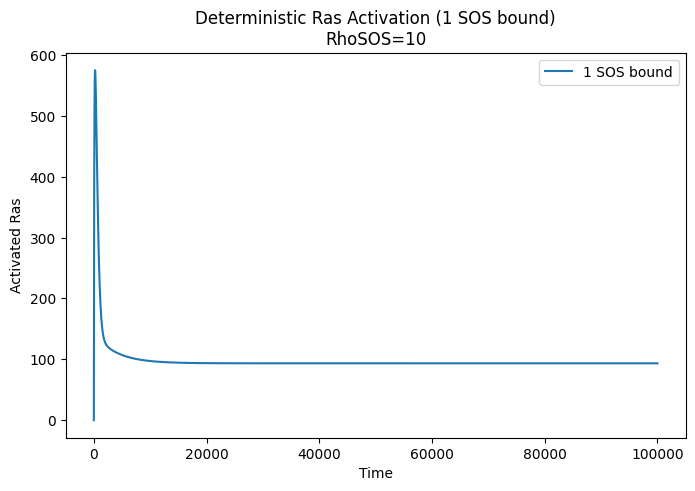

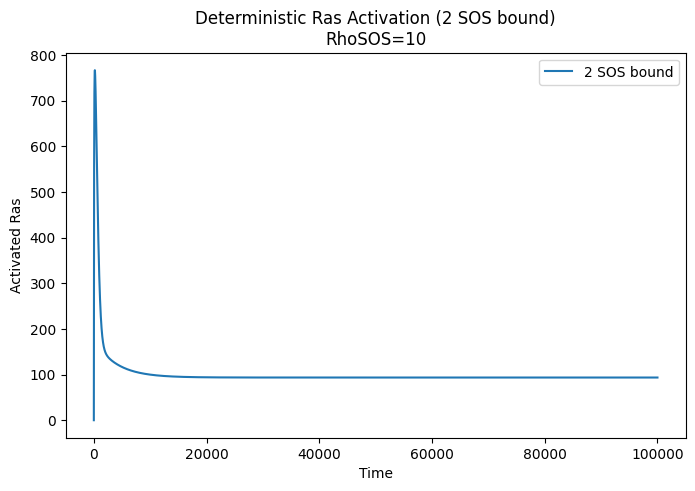

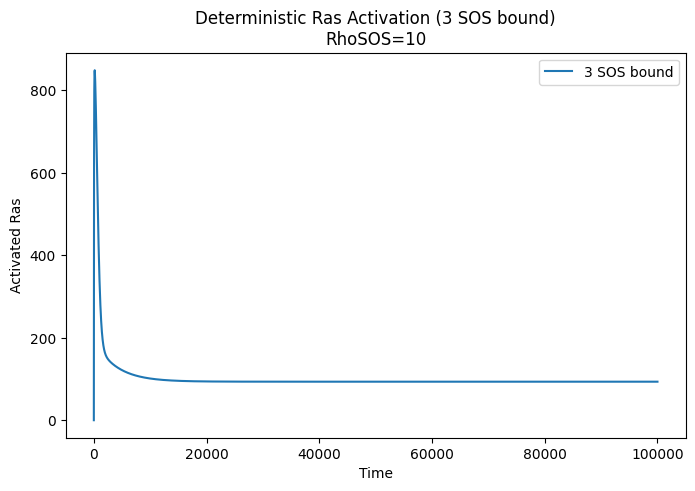

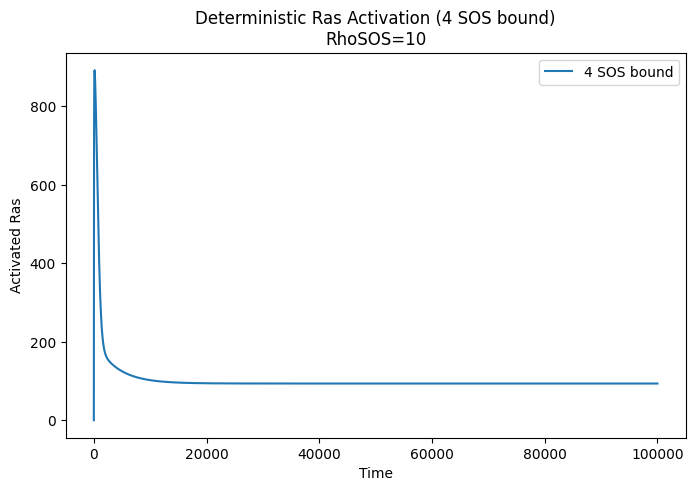

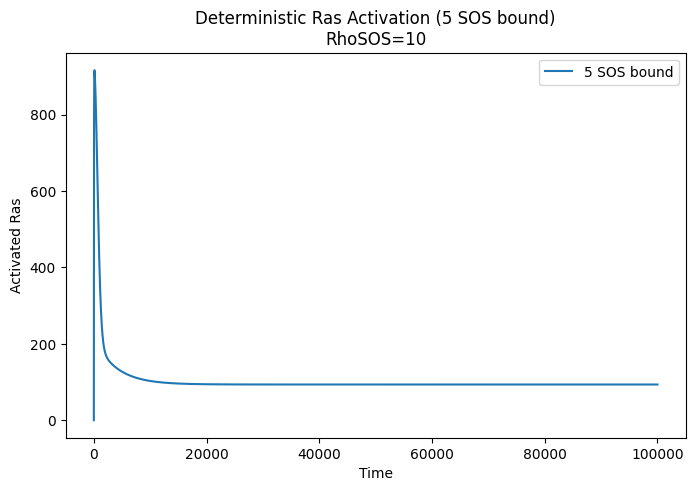

In [6]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

   
    plt.figure(figsize=(8,5))
    plt.plot(traj[:, 0], traj[:, 1], label=f'{n_bound} SOS bound')  # time vs totalRasGTP
    plt.xlabel('Time')
    plt.ylabel('Activated Ras')
    plt.title(f'Deterministic Ras Activation ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()

In [ ]:
import numpy as np

time = traj[:, 0]
ras_gtp = traj[:, 1]

tol = 1e-4  #  tolerance 
window = 10  # number of consecutive points 

final_value = ras_gtp[-1]

# Compute relative changes
rel_change = np.abs(np.diff(ras_gtp)) / final_value

steady_idx = None
for i in range(len(rel_change) - window):
    if np.all(rel_change[i:i+window] < tol):
        steady_idx = i
        break

if steady_idx is not None:
    t_steady = time[steady_idx]
    print(f"{n_bound} SOS bound: steady state at t ≈ {t_steady:.2f}")
else:
    print(f"{n_bound} SOS bound: steady state not reached by t_end")


5 SOS bound: steady state at t ≈ 13631.36


0 SOS bound - steady state at t ≈ 48454.8


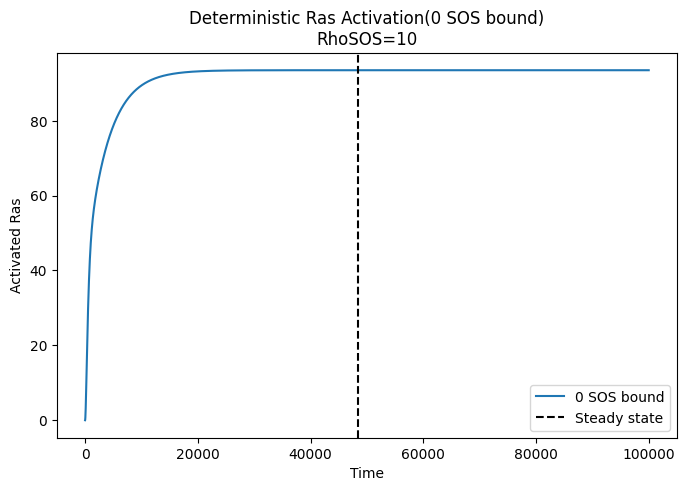

1 SOS bound - steady state at t ≈ 45634.6


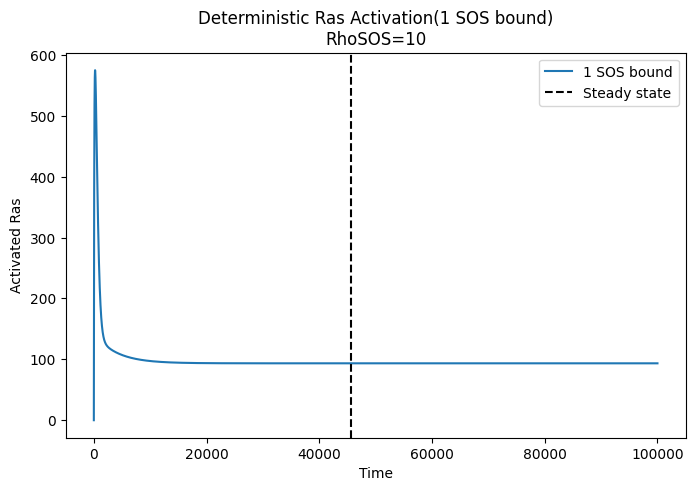

2 SOS bound - steady state at t ≈ 48554.9


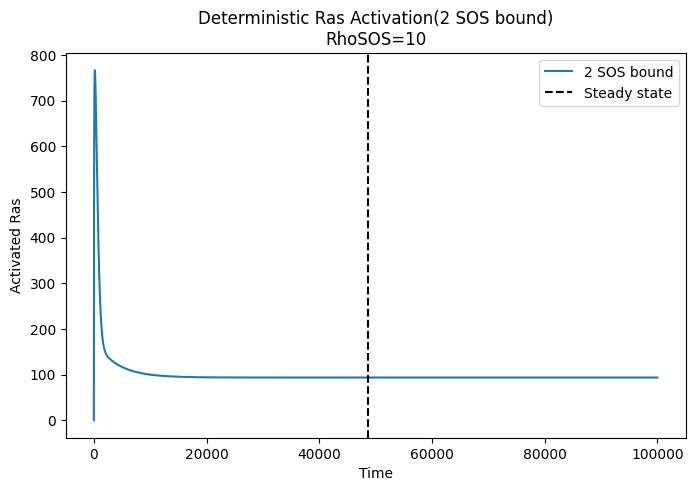

3 SOS bound - steady state at t ≈ 48204.8


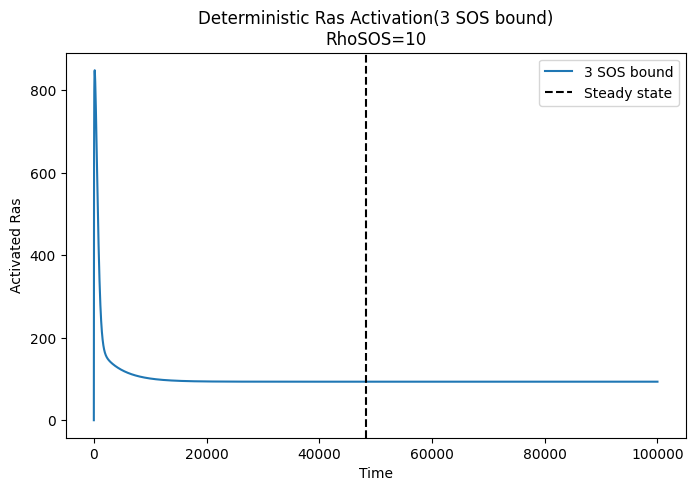

4 SOS bound - steady state at t ≈ 49004.9


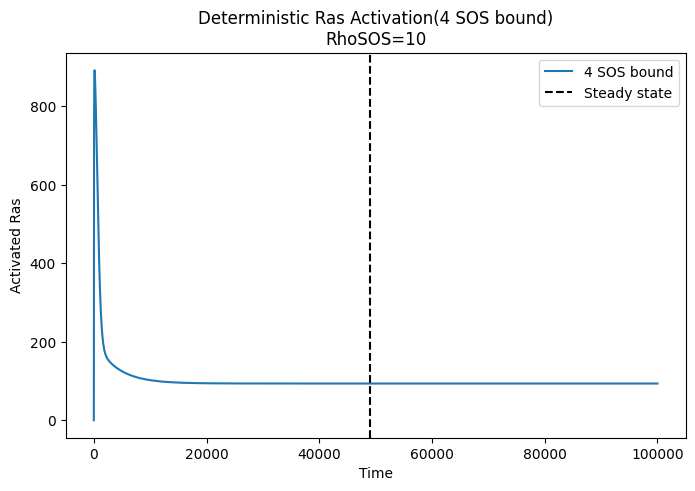

5 SOS bound - steady state at t ≈ 49224.9


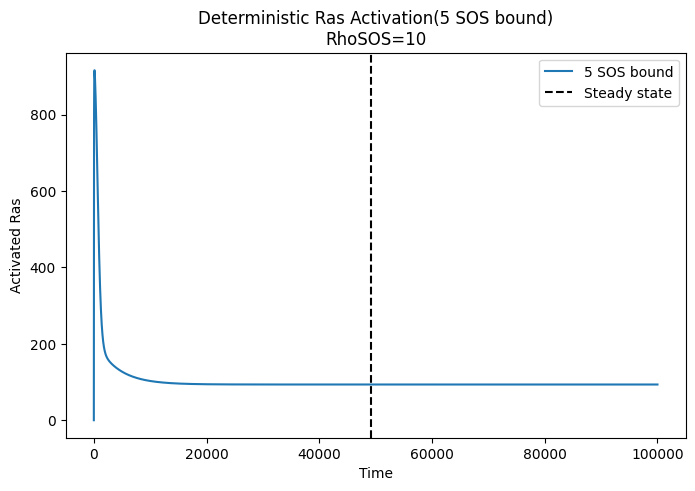

In [8]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10  # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

# steady-state detection 
tol = 1e-8     # relative change tolerance
window = 20    # consecutive time points required

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")
    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    # set parameters
    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 
    sim.reset()

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']
    traj = sim.simulate(0, t_end, n_steps)

    time = traj[:, 0]
    ras_gtp = traj[:, 1]

    #  steady-state  
    final_value = ras_gtp[-1]
    rel_change = np.abs(np.diff(ras_gtp)) / final_value

    steady_idx = None
    for i in range(len(rel_change) - window):
        if np.all(rel_change[i:i+window] < tol):
            steady_idx = i
            break

    if steady_idx is not None:
        t_steady = time[steady_idx]
        print(f"{n_bound} SOS bound - steady state at t ≈ {t_steady:.1f}")
    else:
        t_steady = None
        print(f"{n_bound} SOS bound - steady state NOT reached")

    
    plt.figure(figsize=(8,5))
    plt.plot(time, ras_gtp, label=f'{n_bound} SOS bound')

    if t_steady is not None: 
        plt.axvline(t_steady, color='k', linestyle='--',
                    label='Steady state')

    plt.xlabel('Time')
    plt.ylabel('Activated Ras')
    plt.title(f'Deterministic Ras Activation({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()


0 SOS bound - steady state at t ≈ 48454.8, RasGTP ≈ 93.479


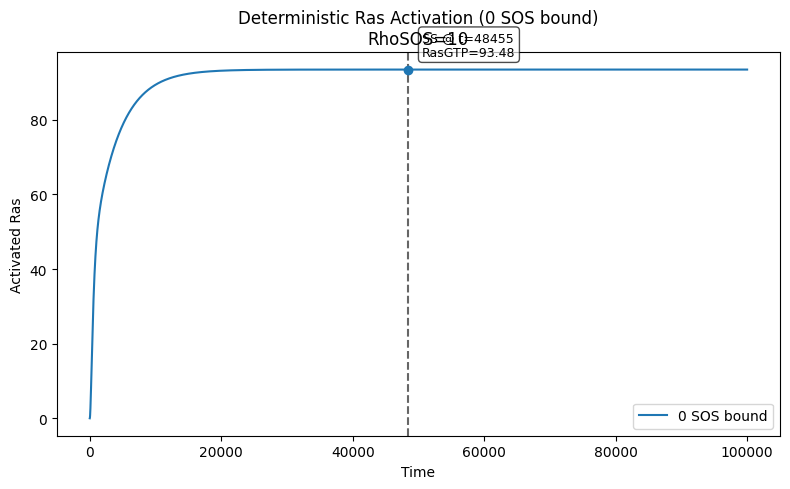

1 SOS bound - steady state at t ≈ 45634.6, RasGTP ≈ 93.479


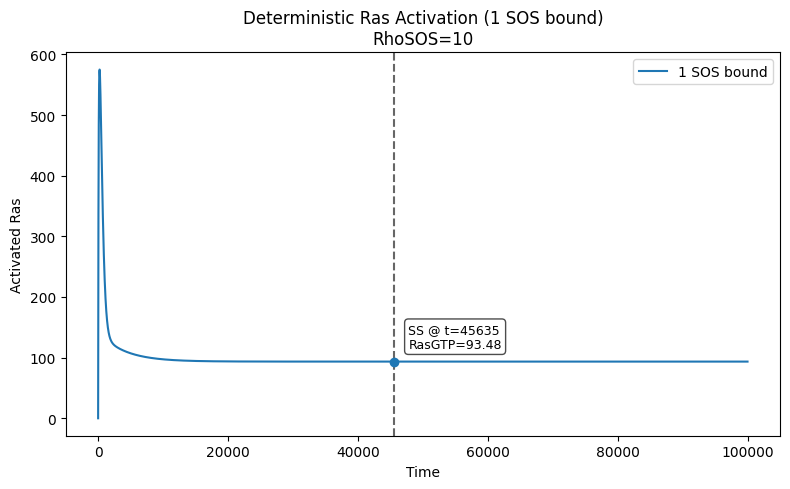

2 SOS bound - steady state at t ≈ 48554.9, RasGTP ≈ 93.479


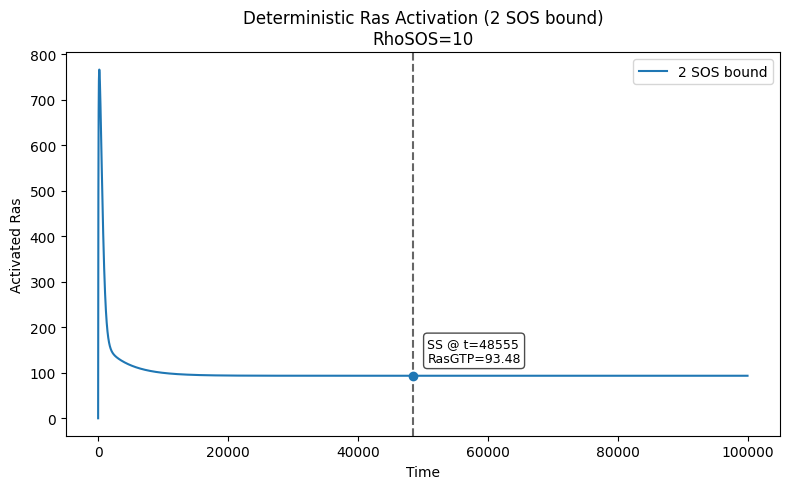

3 SOS bound - steady state at t ≈ 48204.8, RasGTP ≈ 93.479


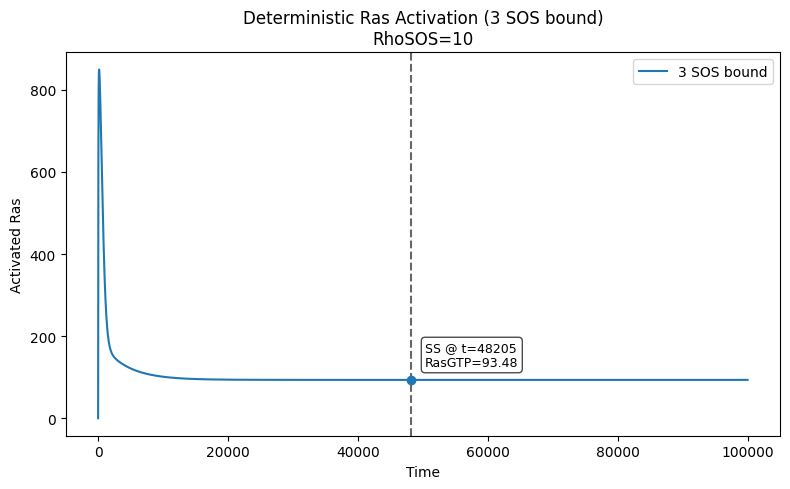

4 SOS bound - steady state at t ≈ 49004.9, RasGTP ≈ 93.479


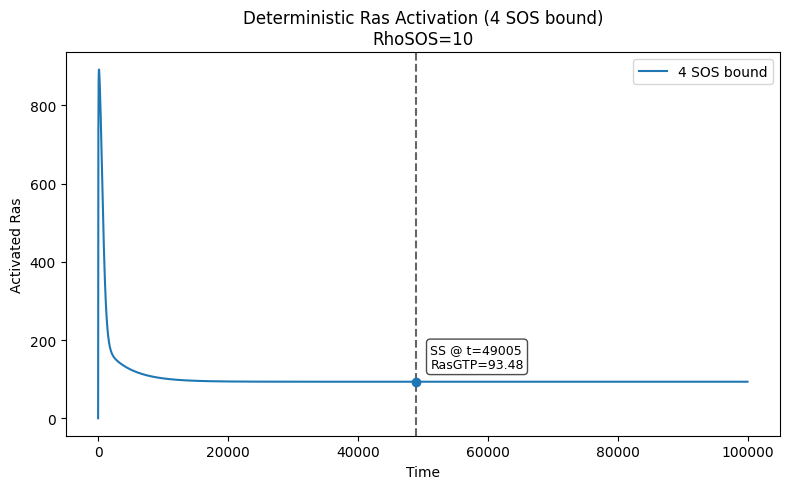

5 SOS bound - steady state at t ≈ 49224.9, RasGTP ≈ 93.479


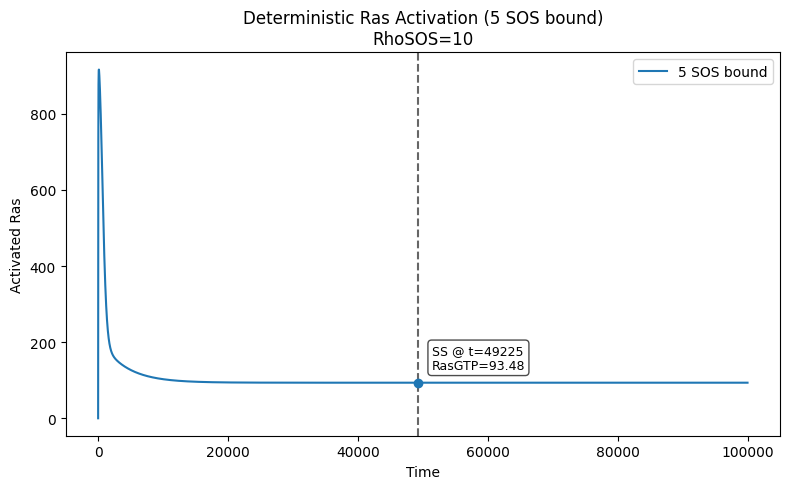

In [9]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

# steady state tolerance
tol = 1e-8
window = 20

for n_bound in n_bound_list:

    model = bionetgen.bngmodel(modelName + ".bngl")
    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    # set parameters
    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS
    sim.reset()

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']
    traj = sim.simulate(0, t_end, n_steps)

    time = traj[:, 0]
    ras_gtp = traj[:, 1]

  # relative change 
    rel_change = np.abs(np.diff(ras_gtp)) / np.maximum(np.abs(ras_gtp[:-1]), 1e-12)

    steady_idx = None
    for i in range(len(rel_change) - window):
        if np.all(rel_change[i:i+window] < tol):
            steady_idx = i
            break

    if steady_idx is not None:
        t_steady = time[steady_idx]
        y_steady = ras_gtp[steady_idx]
        print(f"{n_bound} SOS bound - steady state at t ≈ {t_steady:.1f}, RasGTP ≈ {y_steady:.3f}")
    else:
        t_steady = None
        y_steady = None
        print(f"{n_bound} SOS bound - steady state NOT reached")

    ### 
    plt.figure(figsize=(8,5))
    plt.plot(time, ras_gtp, label=f'{n_bound} SOS bound')

    if t_steady is not None:
        # vertical line at steady state 
        plt.axvline(t_steady, color='k', linestyle='--', alpha=0.6)

        plt.scatter(t_steady, y_steady, zorder=5)

        # label point 
        plt.annotate(
            f'SS @ t={t_steady:.0f}\nRasGTP={y_steady:.2f}',
            xy=(t_steady, y_steady),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7)
        )

    plt.xlabel('Time')
    plt.ylabel('Activated Ras')
    plt.title(f'Deterministic Ras Activation ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.tight_layout()
    plt.show()

0 SOS bound - steady state at t ≈ 95131.0


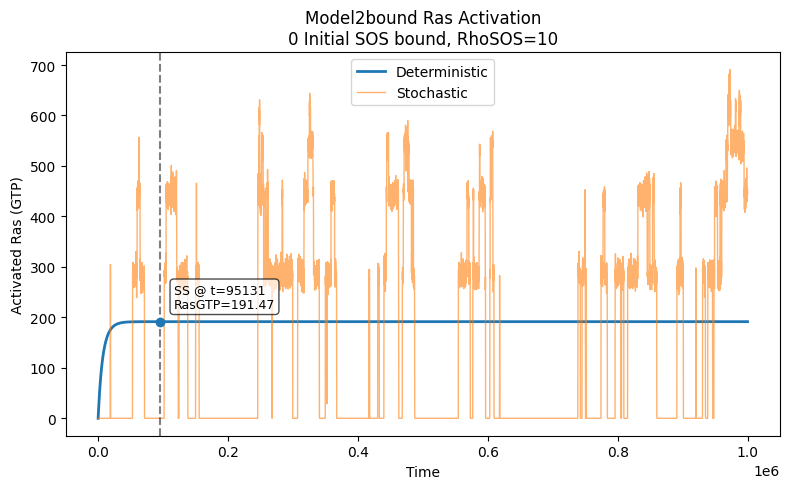

1 SOS bound - steady state at t ≈ 94110.9


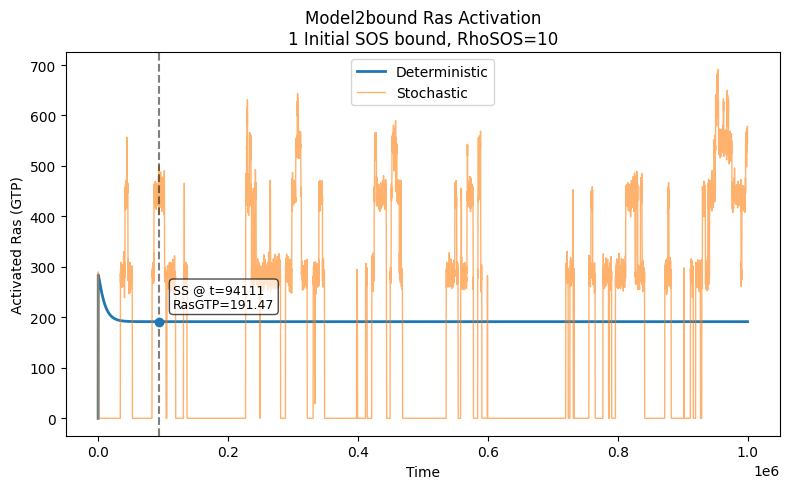

2 SOS bound - steady state at t ≈ 105181.1


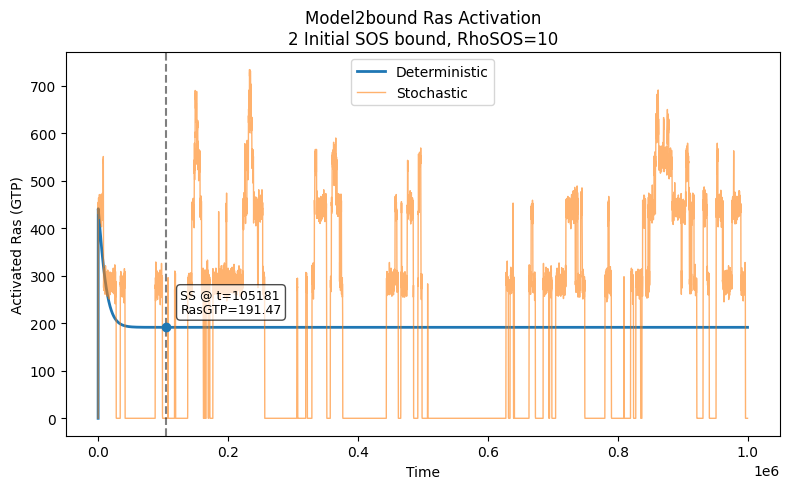

3 SOS bound - steady state at t ≈ 109271.1


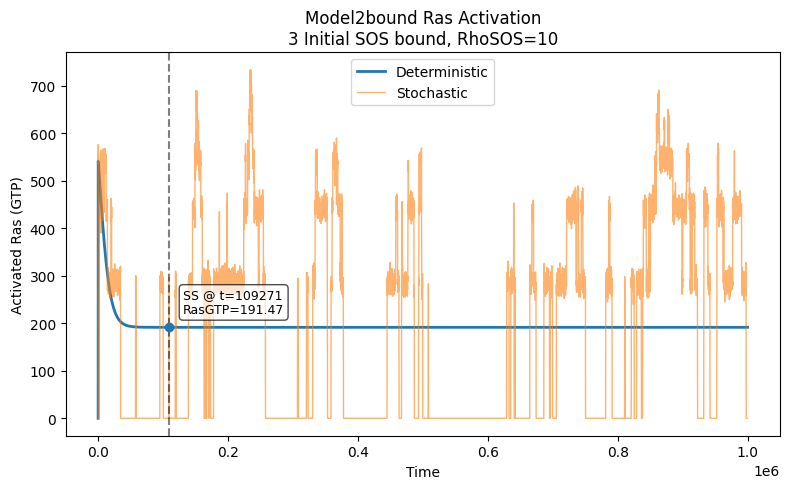

4 SOS bound - steady state at t ≈ 112741.1


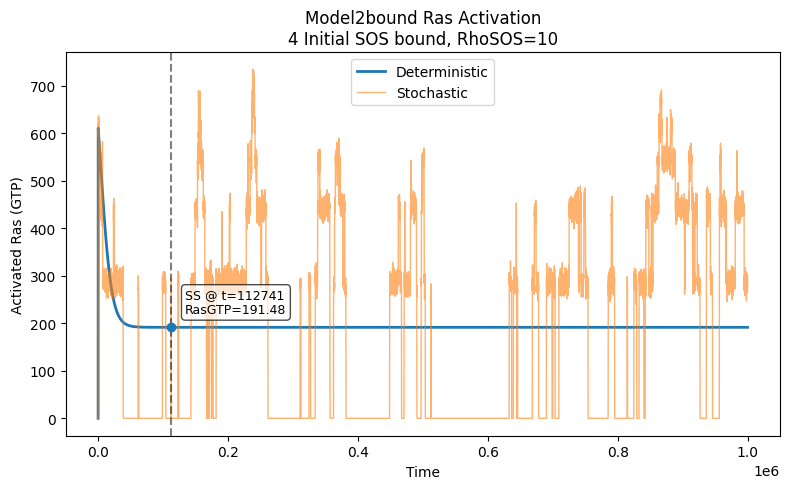

5 SOS bound - steady state at t ≈ 115691.2


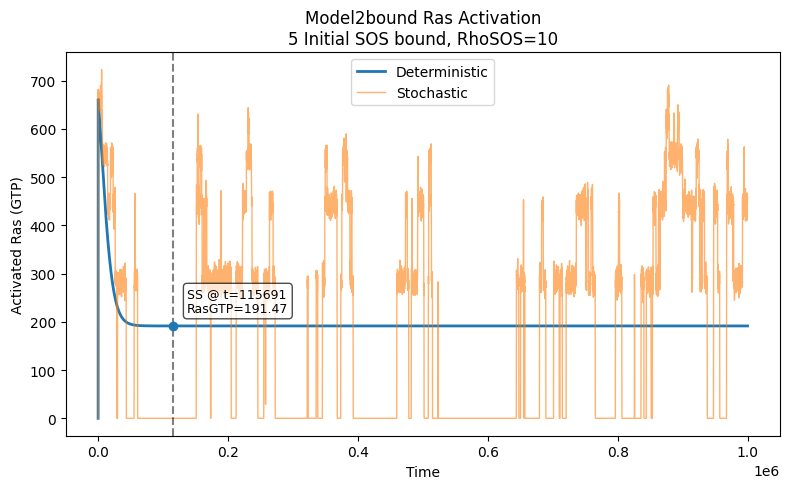

In [ ]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt

modelName = "Model2bound"
#modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 1000000 #Model2 needs 10x longer
n_steps_det = 100000
n_steps_stoch = 10000

# steady state tolerance detection
tol = 1e-8
window = 20

for n_bound in n_bound_list:

    # Deterministic simulation
 
    model_det = bionetgen.bngmodel(modelName + ".bngl")
    sim_det = model_det.setup_simulator()
    sim_det.setIntegrator('cvode')

    sim_det.RasTotal = RasTotal - n_bound
    sim_det.initialBoundSOS = n_bound
    sim_det.RhoSOS = RhoSOS
    sim_det.reset()

    sim_det.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']
    traj_det = sim_det.simulate(0, t_end, n_steps_det)

    time_det = traj_det[:, 0]
    ras_det = traj_det[:, 1]

    # steady state  relative change in activated Ras 
    rel_change = np.abs(np.diff(ras_det)) / np.maximum(np.abs(ras_det[:-1]), 1e-12)

    steady_idx = None
    for i in range(len(rel_change) - window):
        if np.all(rel_change[i:i+window] < tol):
            steady_idx = i # = i + window -1  # i = first point in window 
            break

    if steady_idx is not None:
        t_steady = time_det[steady_idx]
        y_steady = ras_det[steady_idx]
        print(f"{n_bound} SOS bound - steady state at t ≈ {t_steady:.1f}")
    else:
        t_steady = None
        y_steady = None
        print(f"{n_bound} SOS bound - steady state NOT reached")

    # Stochastic simulation
   
    model_stoch = bionetgen.bngmodel(modelName + ".bngl")
    sim_stoch = model_stoch.setup_simulator()
    sim_stoch.setIntegrator('gillespie')

    sim_stoch.RasTotal = RasTotal - n_bound
    sim_stoch.initialBoundSOS = n_bound
    sim_stoch.RhoSOS = RhoSOS
    sim_stoch.reset()

    sim_stoch.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']
    traj_stoch = sim_stoch.simulate(0, t_end, n_steps_stoch)

    time_stoch = traj_stoch[:, 0]
    ras_stoch = traj_stoch[:, 1]

    # Plot both 
  
    plt.figure(figsize=(8,5))
    plt.plot(time_det, ras_det,
             linewidth=2,
             label=f'Deterministic')
    plt.plot(time_stoch, ras_stoch,
             alpha=0.6,
             linewidth=1,
             label=f'Stochastic')

    # steady state marker 
    if t_steady is not None:
        plt.axvline(t_steady, color='k', linestyle='--', alpha=0.5)
        plt.scatter(t_steady, y_steady, zorder=5)

        plt.annotate(
            f'SS @ t={t_steady:.0f}\nRasGTP={y_steady:.2f}',
            xy=(t_steady, y_steady),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7),
        )

    plt.xlabel('Time')
    plt.ylabel('Activated Ras (GTP)')
    plt.title(f'{modelName} Ras Activation\n'
              f'{n_bound} Initial SOS bound, RhoSOS={RhoSOS}')
    plt.legend()
    plt.tight_layout()
    plt.show()

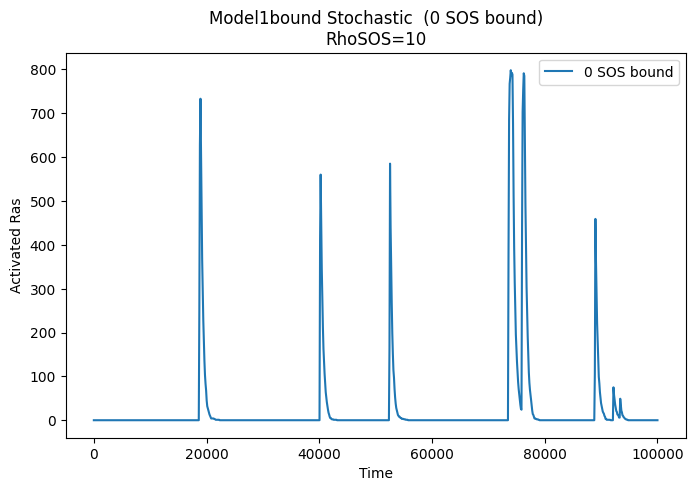

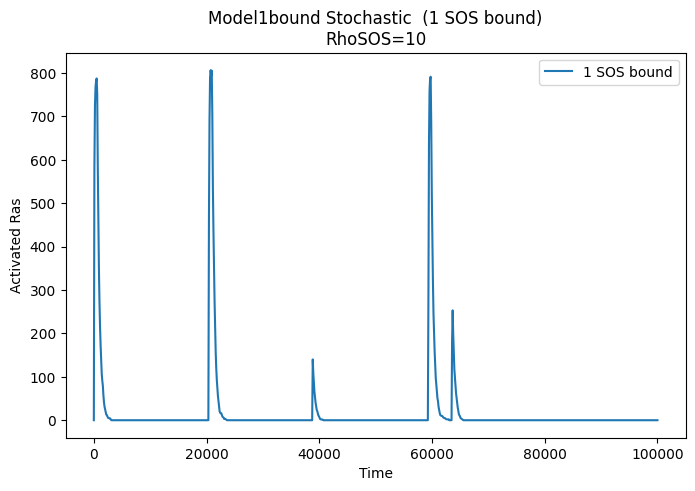

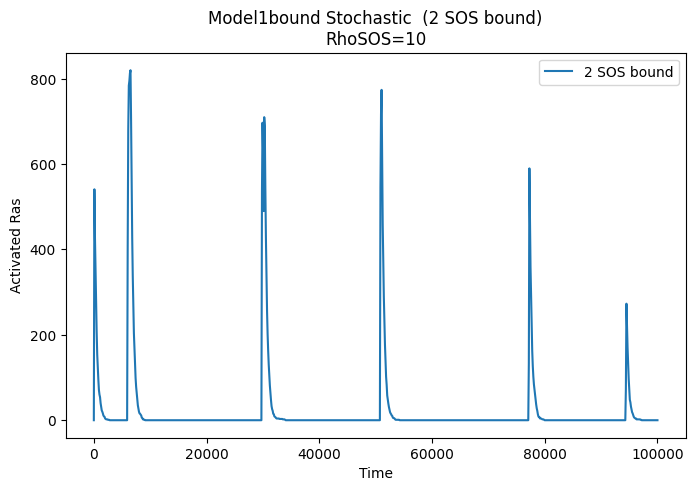

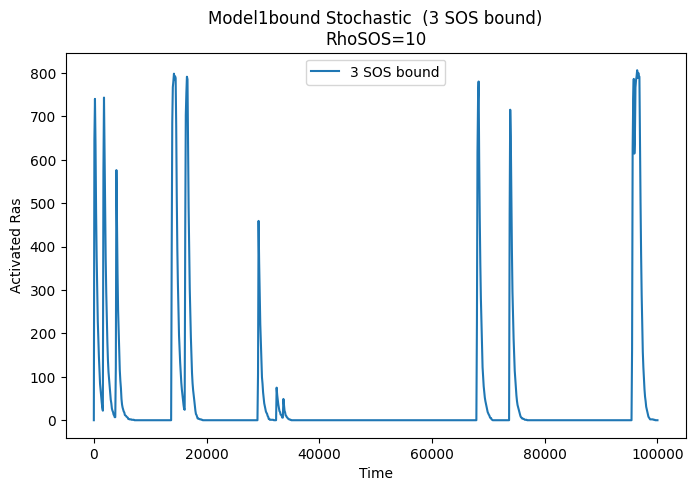

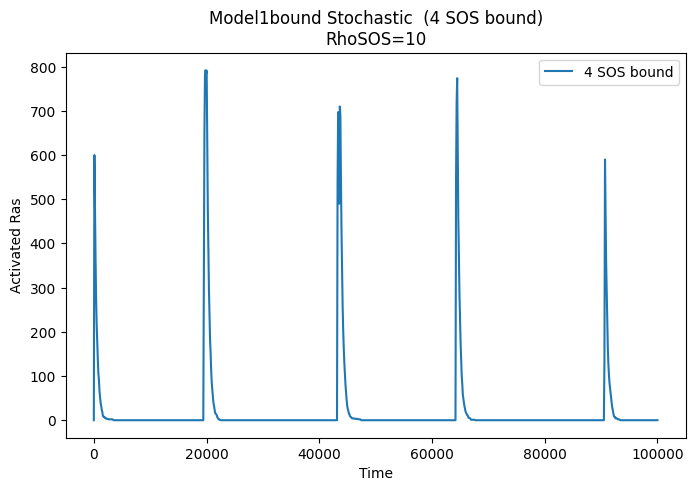

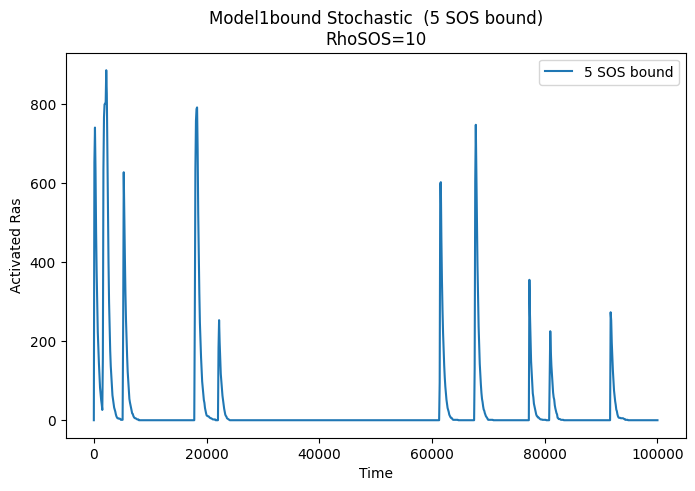

In [63]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 1000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('gillespie')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

   
    plt.figure(figsize=(8,5))
    plt.plot(traj[:, 0], traj[:, 1], label=f'{n_bound} SOS bound')  # time vs totalRasGTP
    plt.xlabel('Time')
    plt.ylabel('Activated Ras')
    plt.title(f'{modelName} Stochastic  ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()

Model 1 (with initial bound) stochastic bound SOS 

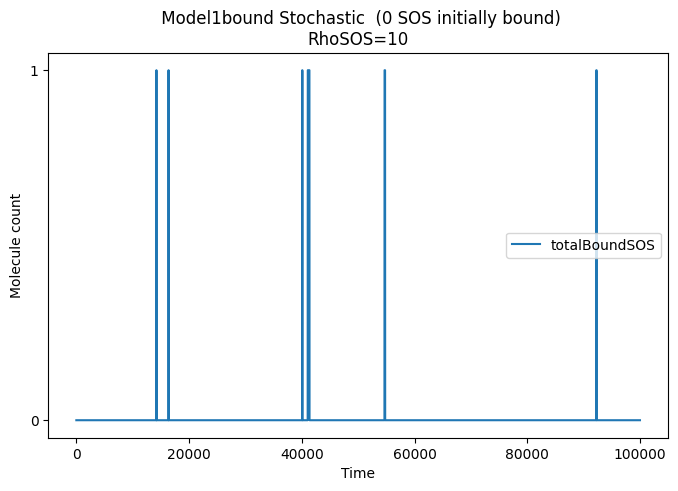

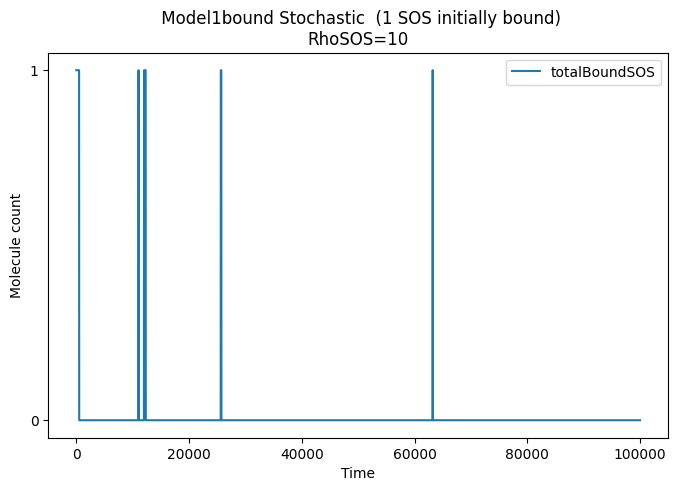

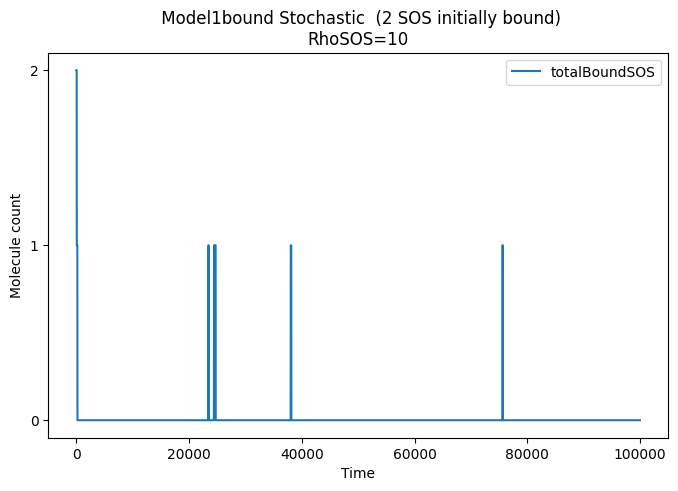

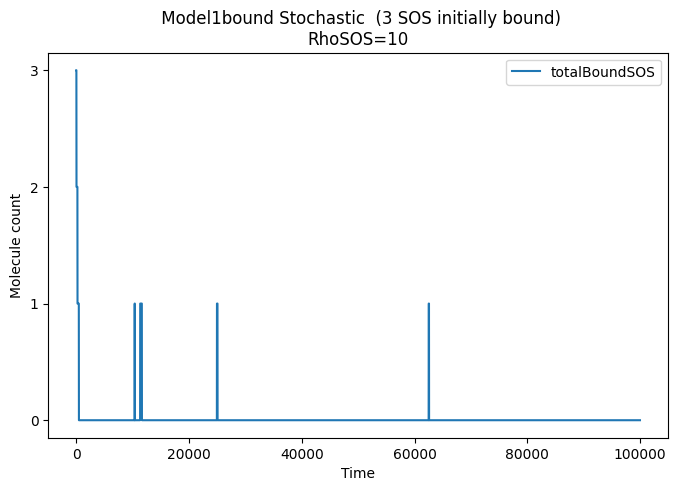

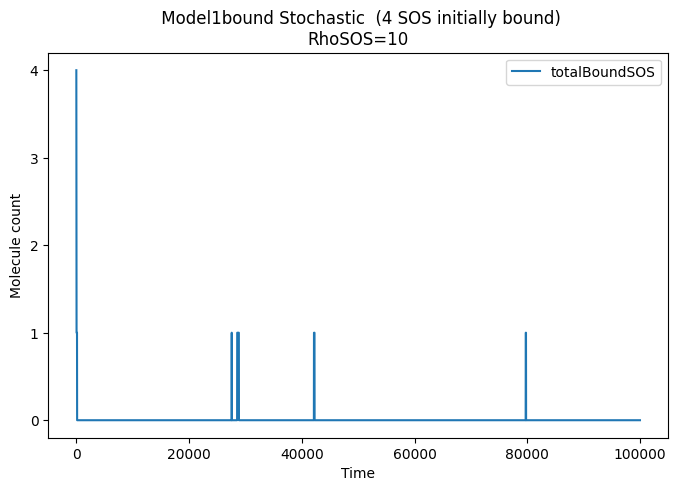

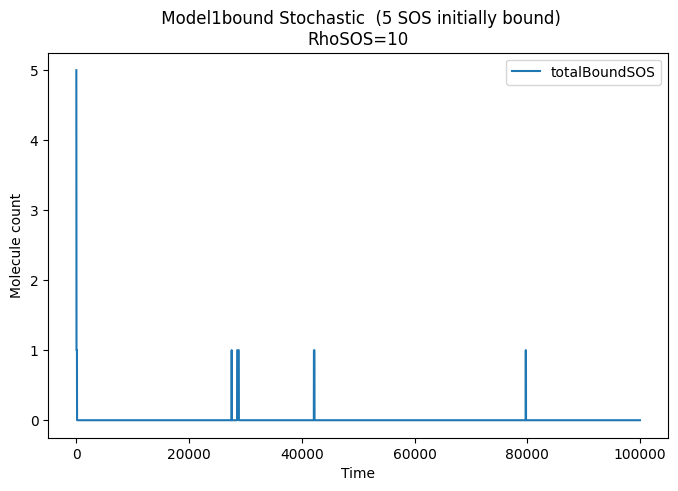

In [64]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration to change
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('gillespie')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

    plt.figure(figsize=(8,5))

    #plt.plot(traj[:, 0], traj[:, 1], label='totalRasGTP')
    plt.plot(traj[:, 0], traj[:, 2], label='totalBoundSOS')

    plt.xlabel('Time')
    plt.ylabel('Molecule count')
    plt.title(
        f' {modelName} Stochastic  ({n_bound} SOS initially bound)\nRhoSOS={RhoSOS}'
    )
    plt.legend()

    y_min = int(np.min(traj[:, 2]))
    y_max = int(np.max(traj[:, 2]))
    plt.yticks(np.arange(y_min, y_max + 1, 1))  # integers

    plt.show()

Model 2 (with initial bound) stochastic bound SOS 

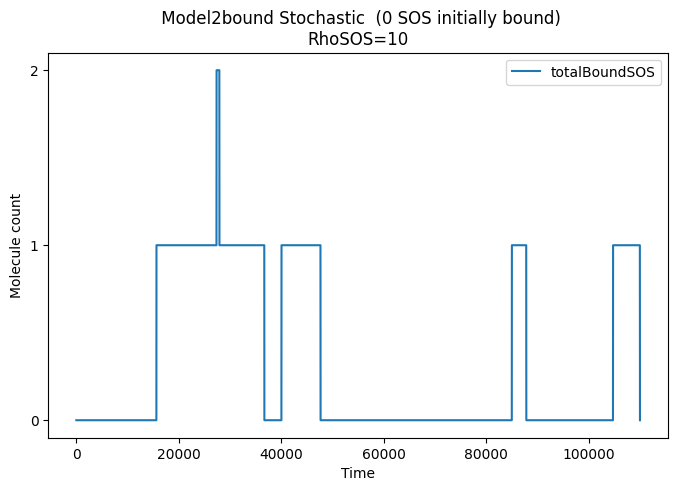

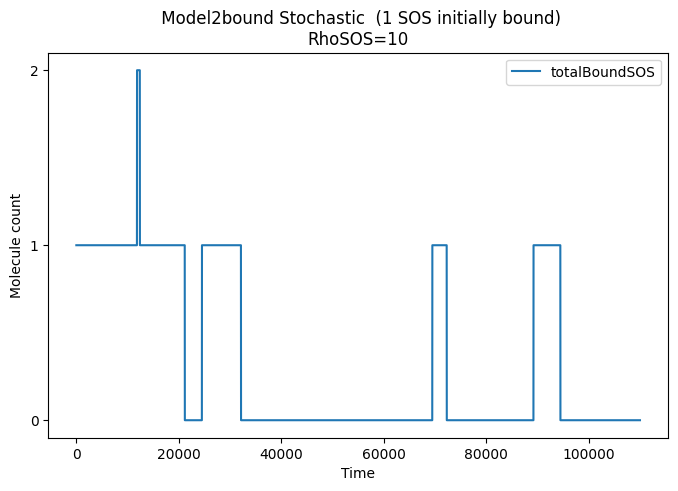

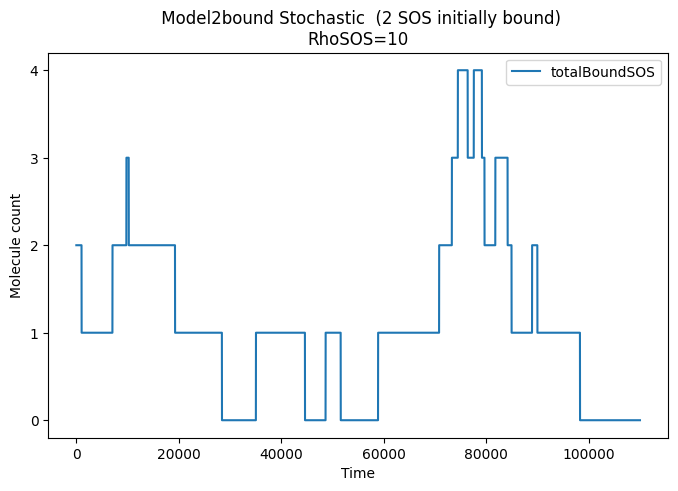

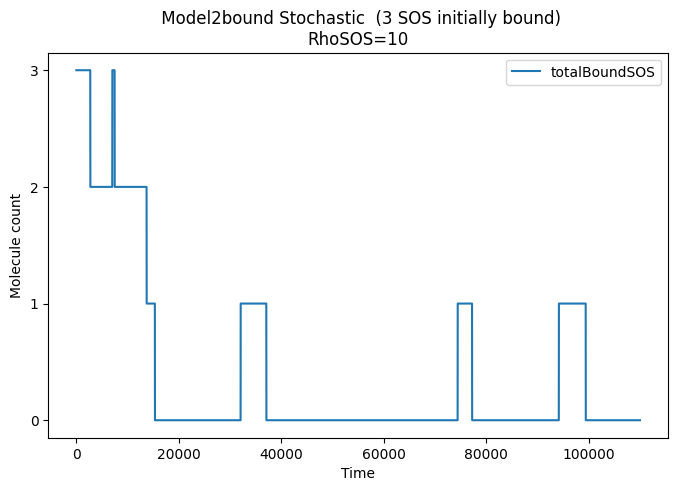

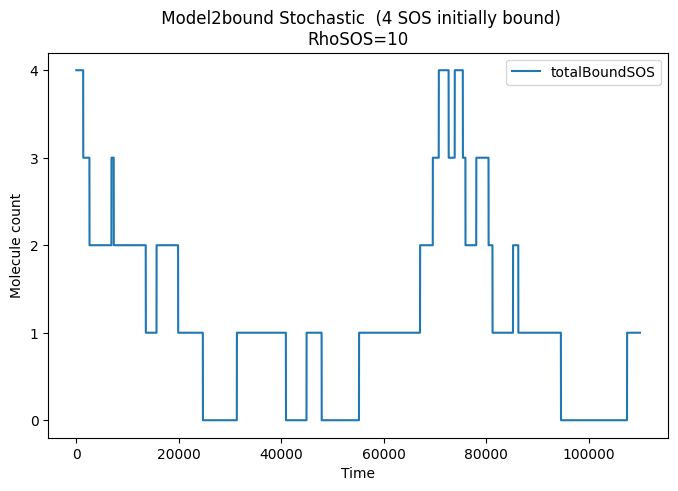

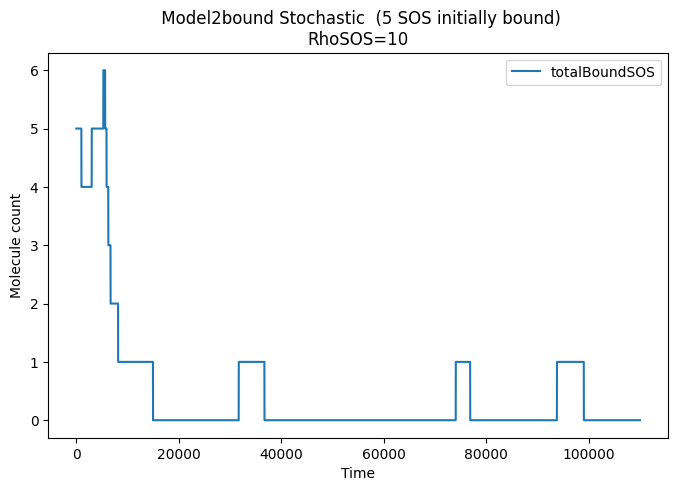

In [65]:
import bionetgen
import matplotlib.pyplot as plt

modelName = "Model2bound"
#modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration to change
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 110000
n_steps = 10000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('gillespie')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

    plt.figure(figsize=(8,5))

    #plt.plot(traj[:, 0], traj[:, 1], label='totalRasGTP')
    plt.plot(traj[:, 0], traj[:, 2], label='totalBoundSOS')

    plt.xlabel('Time')
    plt.ylabel('Molecule count')
    plt.title(
        f' {modelName} Stochastic  ({n_bound} SOS initially bound)\nRhoSOS={RhoSOS}'
    )
    plt.legend()

    y_min = int(np.min(traj[:, 2]))
    y_max = int(np.max(traj[:, 2]))
    plt.yticks(np.arange(y_min, y_max + 1, 1))  # integers

    plt.show()

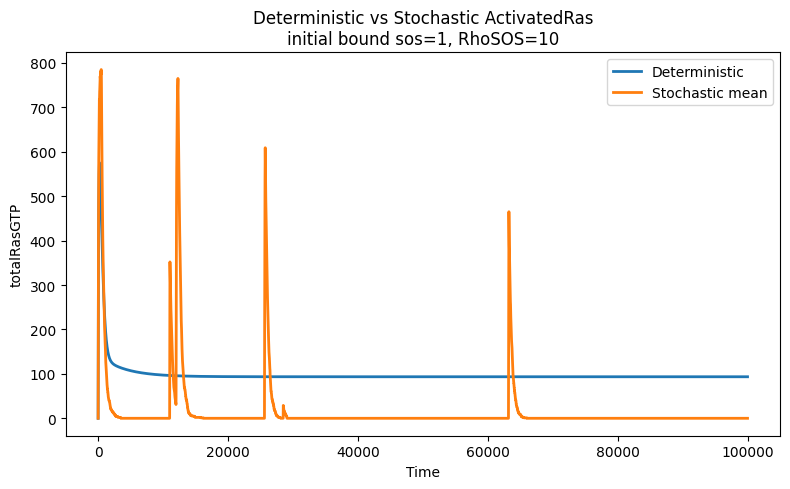

In [66]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt


modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10
n_bound = 1                 
t_end = 100000
n_steps = 10000
N_stoch = 100  #number of stochastic runs to take average 


# Deterministic 

model = bionetgen.bngmodel(modelName + ".bngl")
sim_det = model.setup_simulator()
sim_det.setIntegrator('cvode')

sim_det.RasTotal = RasTotal - n_bound
sim_det.initialBoundSOS = n_bound
sim_det.RhoSOS = RhoSOS
sim_det.reset()

sim_det.selections = ['time', 'totalRasGTP']
traj_det = sim_det.simulate(0, t_end, n_steps)

time = traj_det[:, 0]
activatedRas_det = traj_det[:, 1]


# Stochastic 

activatedRas_stoch_all = []

for _ in range(N_stoch):
    model = bionetgen.bngmodel(modelName + ".bngl")
    sim_stoch = model.setup_simulator()
    sim_stoch.setIntegrator('gillespie')

    sim_stoch.RasTotal = RasTotal - n_bound
    sim_stoch.initialBoundSOS = n_bound
    sim_stoch.RhoSOS = RhoSOS
    sim_stoch.reset()

    sim_stoch.selections = ['time', 'totalRasGTP']
    traj = sim_stoch.simulate(0, t_end, n_steps)

    activatedRas_stoch_all.append(traj[:, 1])

activatedRas_stoch_all = np.array(activatedRas_stoch_all)
activatedRas_stoch_mean = activatedRas_stoch_all.mean(axis=0)



plt.figure(figsize=(8, 5))

plt.plot(time, activatedRas_det, label="Deterministic", linewidth=2)
plt.plot(time, activatedRas_stoch_mean, label="Stochastic mean", linewidth=2)


plt.xlabel("Time")
plt.ylabel("totalRasGTP")
plt.title(f"Deterministic vs Stochastic ActivatedRas\ninitial bound sos={n_bound}, RhoSOS={RhoSOS}")
plt.legend()
plt.tight_layout()
plt.show()


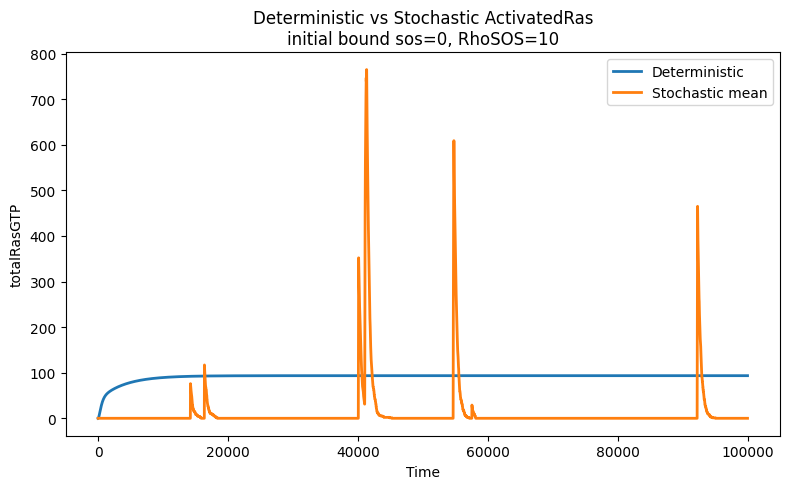

In [67]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt


modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10
n_bound = 0                 
t_end = 100000
n_steps = 10000
N_stoch = 100  #number of stochastic runs to take average 


# Deterministic 

model = bionetgen.bngmodel(modelName + ".bngl")
sim_det = model.setup_simulator()
sim_det.setIntegrator('cvode')

sim_det.RasTotal = RasTotal - n_bound
sim_det.initialBoundSOS = n_bound
sim_det.RhoSOS = RhoSOS
sim_det.reset()

sim_det.selections = ['time', 'totalRasGTP']
traj_det = sim_det.simulate(0, t_end, n_steps)

time = traj_det[:, 0]
activatedRas_det = traj_det[:, 1]


# Stochastic 

activatedRas_stoch_all = []

for _ in range(N_stoch):
    model = bionetgen.bngmodel(modelName + ".bngl")
    sim_stoch = model.setup_simulator()
    sim_stoch.setIntegrator('gillespie')

    sim_stoch.RasTotal = RasTotal - n_bound
    sim_stoch.initialBoundSOS = n_bound
    sim_stoch.RhoSOS = RhoSOS
    sim_stoch.reset()

    sim_stoch.selections = ['time', 'totalRasGTP']
    traj = sim_stoch.simulate(0, t_end, n_steps)

    activatedRas_stoch_all.append(traj[:, 1])

activatedRas_stoch_all = np.array(activatedRas_stoch_all)
activatedRas_stoch_mean = activatedRas_stoch_all.mean(axis=0)



plt.figure(figsize=(8, 5))

plt.plot(time, activatedRas_det, label="Deterministic", linewidth=2)
plt.plot(time, activatedRas_stoch_mean, label="Stochastic mean", linewidth=2)


plt.xlabel("Time")
plt.ylabel("totalRasGTP")
plt.title(f"Deterministic vs Stochastic ActivatedRas\ninitial bound sos={n_bound}, RhoSOS={RhoSOS}")
plt.legend()
plt.tight_layout()
plt.show()


0 SOS bound - steady state at t ≈ 48454.8


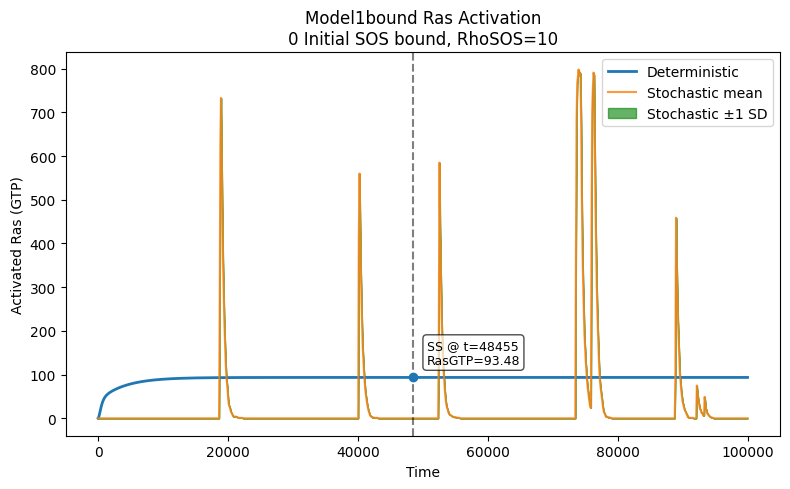

1 SOS bound - steady state at t ≈ 45634.6


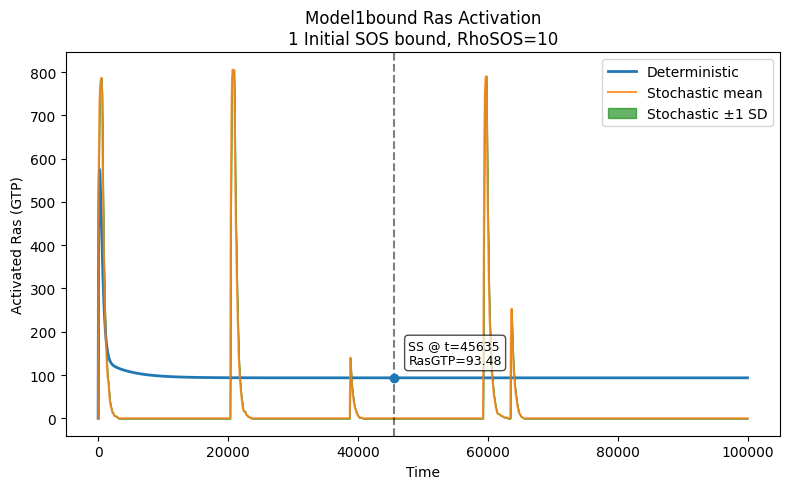

2 SOS bound - steady state at t ≈ 48554.9


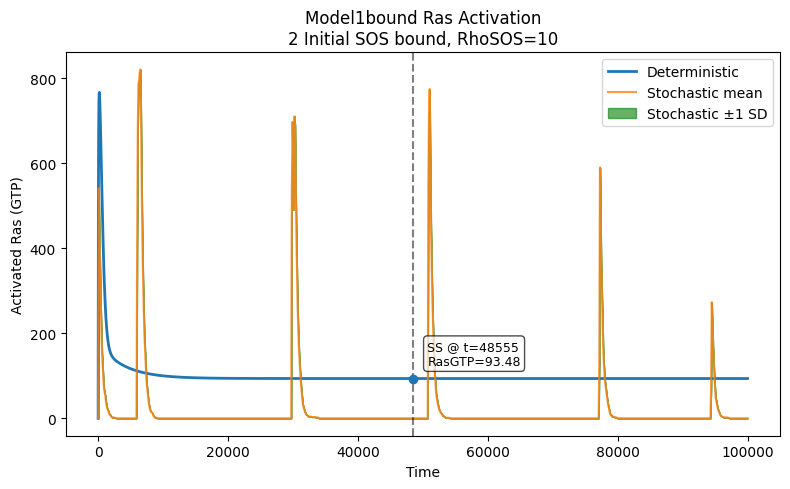

3 SOS bound - steady state at t ≈ 48204.8


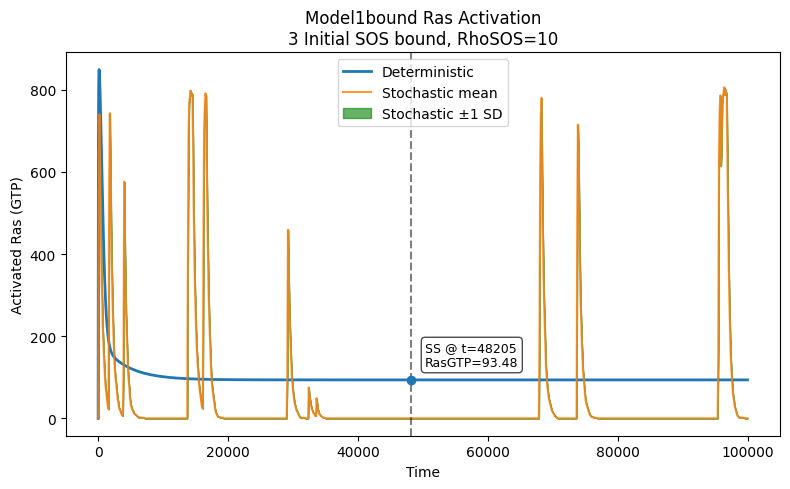

4 SOS bound - steady state at t ≈ 49004.9


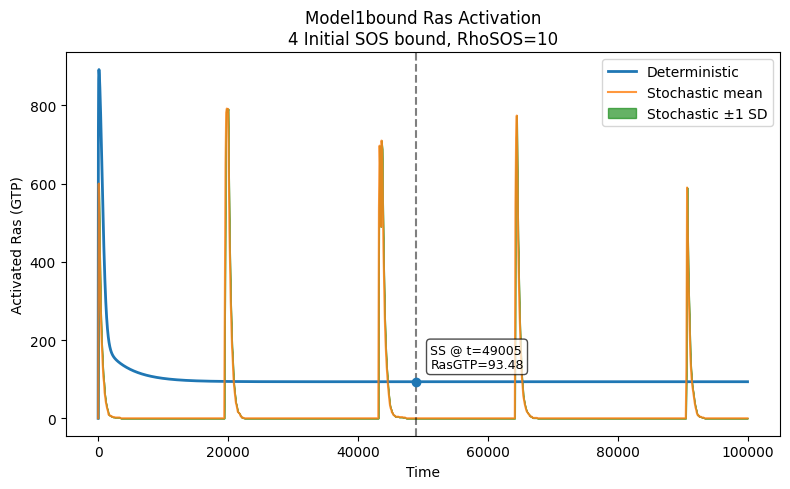

5 SOS bound - steady state at t ≈ 49224.9


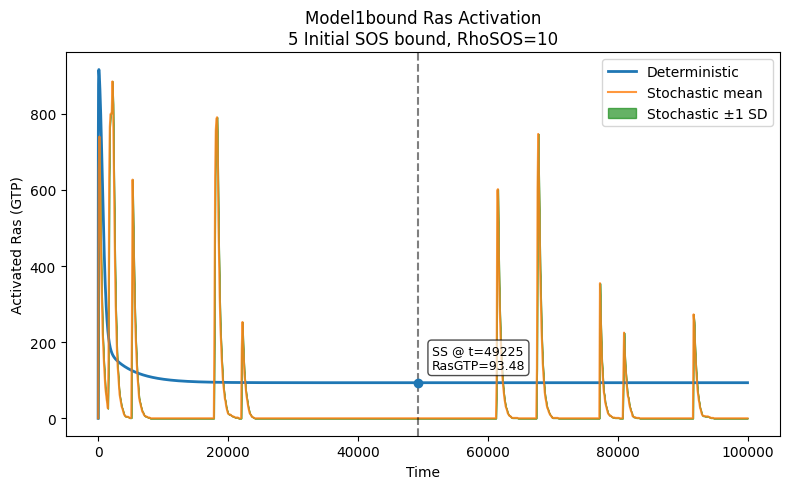

In [68]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt

modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000  # Model2   longer?? 
n_steps_det = 10000
n_steps_stoch = 1000
N_stoch = 30  # number stochastic runs to average

# steady state tolerance detection
tol = 1e-8
window = 20

for n_bound in n_bound_list:

  
    # Deterministic 

    model_det = bionetgen.bngmodel(modelName + ".bngl")
    sim_det = model_det.setup_simulator()
    sim_det.setIntegrator('cvode')

    sim_det.RasTotal = RasTotal - n_bound
    sim_det.initialBoundSOS = n_bound
    sim_det.RhoSOS = RhoSOS
    sim_det.reset()

    sim_det.selections = ['time', 'totalRasGTP']
    traj_det = sim_det.simulate(0, t_end, n_steps_det)

    time_det = traj_det[:, 0]
    ras_det = traj_det[:, 1]

    
    # find steady state 
    rel_change = np.abs(np.diff(ras_det)) / np.maximum(np.abs(ras_det[:-1]), 1e-12)
    steady_idx = None
    for i in range(len(rel_change) - window):
        if np.all(rel_change[i:i+window] < tol):
            steady_idx = i
            break

    if steady_idx is not None:
        t_steady = time_det[steady_idx]
        y_steady = ras_det[steady_idx]
        print(f"{n_bound} SOS bound - steady state at t ≈ {t_steady:.1f}")
    else:
        t_steady = None
        y_steady = None
        print(f"{n_bound} SOS bound - steady state NOT reached")

    
    # Stochastic simulations averaged 
    
    ras_stoch_all = []

    for _ in range(N_stoch):
        model_stoch = bionetgen.bngmodel(modelName + ".bngl")
        sim_stoch = model_stoch.setup_simulator()
        sim_stoch.setIntegrator('gillespie')

        sim_stoch.RasTotal = RasTotal - n_bound
        sim_stoch.initialBoundSOS = n_bound
        sim_stoch.RhoSOS = RhoSOS
        sim_stoch.reset()

        sim_stoch.selections = ['time', 'totalRasGTP']
        traj = sim_stoch.simulate(0, t_end, n_steps_stoch)

        ras_stoch_all.append(traj[:, 1])

    ras_stoch_all = np.array(ras_stoch_all)
    ras_stoch_mean = ras_stoch_all.mean(axis=0)
    ras_stoch_std = ras_stoch_all.std(axis=0)

    time_stoch = traj[:, 0]  # all same time points 

    
    plt.figure(figsize=(8,5))
    plt.plot(time_det, ras_det, linewidth=2, label='Deterministic')
    plt.plot(time_stoch, ras_stoch_mean, linewidth=1.5, label='Stochastic mean', alpha=0.8)

    # SD 
    plt.fill_between(time_stoch,
                     ras_stoch_mean - ras_stoch_std,
                     ras_stoch_mean + ras_stoch_std,
                     color='green', alpha=0.6,
                     label='Stochastic ±1 SD')

    # steady state mark
    if t_steady is not None:
        plt.axvline(t_steady, color='k', linestyle='--', alpha=0.5)
        plt.scatter(t_steady, y_steady, zorder=5)
        plt.annotate(
            f'SS @ t={t_steady:.0f}\nRasGTP={y_steady:.2f}',
            xy=(t_steady, y_steady),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7),
        )

    plt.xlabel('Time')
    plt.ylabel('Activated Ras (GTP)')
    plt.title(f'{modelName} Ras Activation\n'
              f'{n_bound} Initial SOS bound, RhoSOS={RhoSOS}')
    plt.legend()
    plt.tight_layout()
    plt.show()

## original model , without bound species

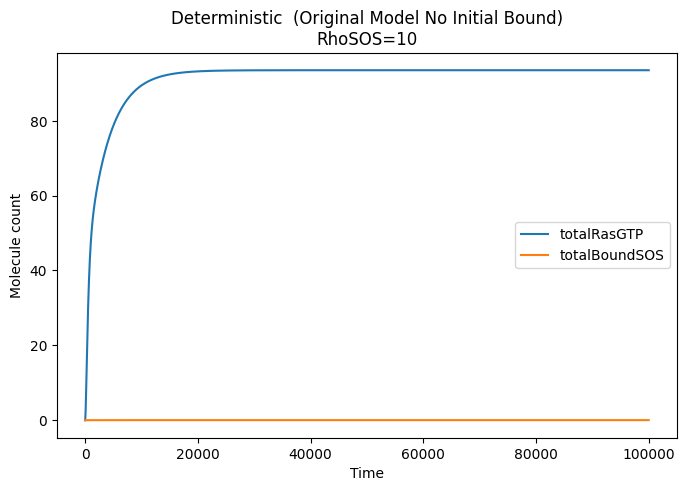

In [69]:
import bionetgen
import matplotlib.pyplot as plt


modelName = "Model1"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 


t_end = 100000
n_steps = 10000


   
model = bionetgen.bngmodel(modelName + ".bngl")

sim = model.setup_simulator()
sim.setIntegrator('cvode')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 


sim.RhoSOS = RhoSOS 

sim.reset()

# Setup simulator AFTER updating parameters
    

sim.selections = ['time','totalRasGTP','totalBoundRas']

traj = sim.simulate(0, t_end, n_steps)

  
plt.figure(figsize=(8,5))

plt.plot(traj[:, 0], traj[:, 1], label='totalRasGTP')
plt.plot(traj[:, 0], traj[:, 2], label='totalBoundSOS')

plt.xlabel('Time')
plt.ylabel('Molecule count')
plt.title(
    f'Deterministic  (Original Model No Initial Bound)\nRhoSOS={RhoSOS}'
)
plt.legend()
plt.show()

0 SOS bound - steady state at t ≈ 95131.0


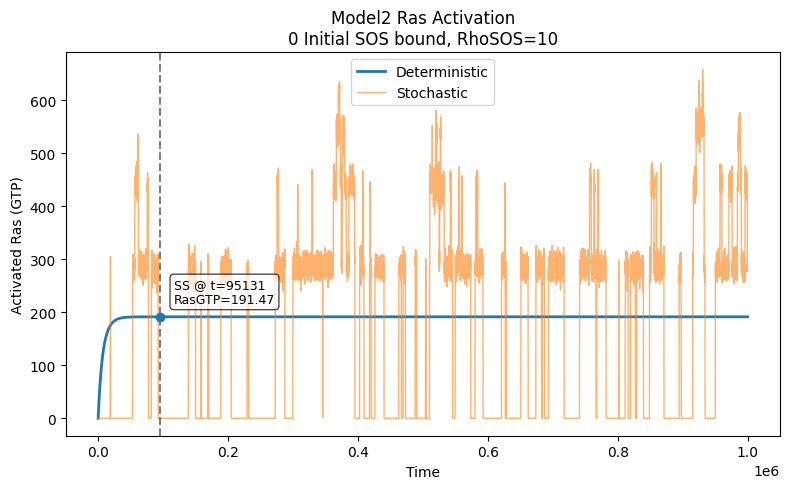

In [70]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt

#modelName = "Model2bound"
#modelName = "Model1bound"
modelName = "Model2"
RasTotal = 1000
RhoSOS = 10
n_bound = 0 

t_end = 1000000
n_steps_det = 100000
n_steps_stoch = 10000

# steady state tolerance detection
tol = 1e-8
window = 20

model_det = bionetgen.bngmodel(modelName + ".bngl")
sim_det = model_det.setup_simulator()
sim_det.setIntegrator('cvode')

#sim_det.RasTotal = RasTotal - n_bound
#sim_det.initialBoundSOS = n_bound
sim_det.RhoSOS = RhoSOS
sim_det.reset()

sim_det.selections = ['time', 'totalRasGTP', 'totalBoundRas', 'TotalRas']
traj_det = sim_det.simulate(0, t_end, n_steps_det)

time_det = traj_det[:, 0]
ras_det = traj_det[:, 1]

# steady state 
rel_change = np.abs(np.diff(ras_det)) / np.maximum(np.abs(ras_det[:-1]), 1e-12)

steady_idx = None
for i in range(len(rel_change) - window):
    if np.all(rel_change[i:i+window] < tol):
        steady_idx = i
        break

if steady_idx is not None:
    t_steady = time_det[steady_idx]
    y_steady = ras_det[steady_idx]
    print(f"{n_bound} SOS bound - steady state at t ≈ {t_steady:.1f}")
else:
    t_steady = None
    y_steady = None
    print(f"{n_bound} SOS bound - steady state NOT reached")

# Stochastic simulation

model_stoch = bionetgen.bngmodel(modelName + ".bngl")
sim_stoch = model_stoch.setup_simulator()
sim_stoch.setIntegrator('gillespie')

sim_stoch.RasTotal = RasTotal - n_bound
sim_stoch.initialBoundSOS = n_bound
sim_stoch.RhoSOS = RhoSOS
sim_stoch.reset()

sim_stoch.selections = ['time', 'totalRasGTP', 'totalBoundRas', 'TotalRas']
traj_stoch = sim_stoch.simulate(0, t_end, n_steps_stoch)

time_stoch = traj_stoch[:, 0]
ras_stoch = traj_stoch[:, 1]

# Plot both 

plt.figure(figsize=(8,5))
plt.plot(time_det, ras_det,
            linewidth=2,
            label=f'Deterministic')
plt.plot(time_stoch, ras_stoch,
            alpha=0.6,
            linewidth=1,
            label=f'Stochastic')

# steady-state marker 
if t_steady is not None:
    plt.axvline(t_steady, color='k', linestyle='--', alpha=0.5)
    plt.scatter(t_steady, y_steady, zorder=5)

    plt.annotate(
        f'SS @ t={t_steady:.0f}\nRasGTP={y_steady:.2f}',
        xy=(t_steady, y_steady),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7),
    )

plt.xlabel('Time')
plt.ylabel('Activated Ras (GTP)')
plt.title(f'{modelName} Ras Activation\n'
            f'{n_bound} Initial SOS bound, RhoSOS={RhoSOS}')
plt.legend()
plt.tight_layout()
plt.show()